<a href="https://colab.research.google.com/github/sharmapranay38/yantrapragya/blob/main/Hindi_sentiment_analysis%20best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas numpy matplotlib scikit-learn tensorflow keras


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
from tensorflow.python.keras import layers
import tensorflow as tf

In [13]:
from numpy.random import seed
seed(1)
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(42)


In [14]:
from google.colab import files
uploaded = files.upload()


Saving emotions.csv to emotions (1).csv


In [17]:
import io
df = pd.read_csv(io.BytesIO(uploaded['emotions (1).csv']))


In [18]:
df.head()

,Sentences,Label
0,मेरे ट्रैन का बुकिंग फेल हो रहा है बार बार,angry
1,मेरे फ्लाइट का बुकिंग फेल हो रहा है बार बार,angry
2,क्या बेकार की बातें कर रहे हो,angry
3,क्या बताओ यार मूड ही ख़राब है,angry
4,आप ऐसे कैसे मेरा पैसा काट सकते हो,angry


In [19]:
df.shape

(513, 2)

In [20]:
y = df["Label"]
X = df.drop(["Label"], axis = 1)

In [21]:
# 70/15/15 train/test/val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

X_train.head()

,Sentences
171,आये होये ! ! ! आज तो तूने दिल जीत लिया भाई
226,शुक्रिया तुम्हारा
24,यार बार बार इंडिका ही क्यों बुक होता है
33,ऐसे कैसे चैनल्स बंद कर दिए आप
167,वाह ! ! ! सस्ती चीज बता दी यार


In [22]:
tk = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n')


tk.fit_on_texts(X['Sentences'])

# + 1 for unknown token
vocab_size = len(tk.word_index) +1

X_train_seq = tk.texts_to_sequences(X_train['Sentences'])
X_test_seq = tk.texts_to_sequences(X_test['Sentences'])
X_val_seq = tk.texts_to_sequences(X_val['Sentences'])
# Initializing max length of sentence to 20 words
max_length = 20

In [23]:
tk.word_index

{'है': 1,
 'क्या': 2,
 'हो': 3,
 'नहीं': 4,
 'यार': 5,
 'कर': 6,
 'ये': 7,
 'बहुत': 8,
 'में': 9,
 'से': 10,
 'एक': 11,
 'की': 12,
 'होटल': 13,
 'का': 14,
 'कैब': 15,
 'था': 16,
 'तुम': 17,
 'के': 18,
 'बुक': 19,
 'काम': 20,
 'मेरे': 21,
 'बार': 22,
 'गया': 23,
 'मै': 24,
 'रहा': 25,
 'मेरा': 26,
 'अच्छा': 27,
 'फ्लाइट': 28,
 'पैसे': 29,
 'कैसे': 30,
 'सर्विस': 31,
 'मुझे': 32,
 'ही': 33,
 'तो': 34,
 'और': 35,
 'भाई': 36,
 'एप': 37,
 'आ': 38,
 'थी': 39,
 'मेरी': 40,
 'कुछ': 41,
 'रिचार्ज': 42,
 'ट्रैन': 43,
 'तक': 44,
 'क्यों': 45,
 'लिए': 46,
 'अकाउंट': 47,
 'भी': 48,
 'समझ': 49,
 'एप्प': 50,
 'अरे': 51,
 'टिकट': 52,
 'करने': 53,
 'कब': 54,
 'बात': 55,
 'ने': 56,
 'दिया': 57,
 'धन्यवाद': 58,
 'वाह': 59,
 'आज': 60,
 'तुमने': 61,
 'तुमसे': 62,
 'काफी': 63,
 'दो': 64,
 'बुकिंग': 65,
 'बेकार': 66,
 'रहे': 67,
 'जल्दी': 68,
 'कितना': 69,
 'करो': 70,
 'टाइम': 71,
 'ड्राइवर': 72,
 'मैं': 73,
 'आया': 74,
 'तुम्हारा': 75,
 'सही': 76,
 'को': 77,
 'हु': 78,
 'कोई': 79,
 'किया': 80,
 'तूने': 81,


In [24]:
print(vocab_size)


686


In [25]:
X_train_seq

[[457, 458, 60, 34, 81, 196, 267, 150, 36],
 [145, 75],
 [5, 22, 22, 353, 33, 45, 19, 176, 1],
 [125, 30, 88, 135, 6, 231, 92],
 [59, 192, 235, 222, 140, 5],
 [51, 7, 30, 94, 5],
 [2, 459, 6, 57, 81],
 [99, 402, 10, 403, 3, 95, 40],
 [5, 54, 94, 42, 21, 47, 14],
 [11, 147, 270, 190, 1],
 [305, 12, 212, 10, 209, 12, 79, 43, 52, 1],
 [7, 2, 132, 1],
 [223, 336, 22, 220, 12, 1, 337, 41, 338, 4, 339, 25],
 [13, 40, 325, 18, 293, 10, 4, 16],
 [40, 43, 71, 10, 116, 239, 1, 539],
 [149, 11, 65, 6, 131, 15, 12],
 [96, 182, 71, 550, 112, 120, 105],
 [15, 98, 56, 161, 651, 10, 55, 4, 12],
 [93, 42, 6, 225, 226, 10],
 [51, 7, 88, 45, 4, 38, 25, 427],
 [240],
 [13, 10, 628, 27, 4, 16],
 [2, 26, 11, 20, 555],
 [5, 2, 132, 6, 67, 3, 17],
 [2, 132, 228, 359],
 [122, 18, 46, 58],
 [2, 478, 20, 80, 1, 36],
 [196, 267, 150, 81],
 [40, 43, 14, 308, 211, 70],
 [124, 153, 121, 39, 2, 562],
 [113, 34, 20, 18, 392, 17],
 [28, 9, 547, 18, 46, 48, 41, 19, 6, 64],
 [13, 34, 102, 1],
 [11, 545, 19, 70],
 [29, 26

In [26]:
#padding the sequences to make all the input sequences of the same length

X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length,padding='post')
X_val_seq_pad = pad_sequences(X_val_seq, maxlen=max_length,padding='post')


In [27]:

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_val_le = le.transform(y_val)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
y_val_oh = to_categorical(y_val_le)

In [28]:
X_train_seq_pad

array([[457, 458,  60, ...,   0,   0,   0],
       [145,  75,   0, ...,   0,   0,   0],
       [  5,  22,  22, ...,   0,   0,   0],
       ...,
       [ 96, 192,  28, ...,   0,   0,   0],
       [237,  77,  11, ...,   0,   0,   0],
       [119,  32, 192, ...,   0,   0,   0]], dtype=int32)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import tensorflow as tf

emb_dims = 256

model = Sequential()
model.add(Embedding(vocab_size, emb_dims, input_length=max_length, embeddings_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(LSTM(units=16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_seq_pad, y_train_oh, epochs=128, batch_size=256, validation_data=(X_val_seq_pad, y_val_oh), shuffle=False)


Epoch 1/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2931 - loss: 1.3981 - val_accuracy: 0.1364 - val_loss: 1.3934
Epoch 2/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.2770 - loss: 1.3916 - val_accuracy: 0.4091 - val_loss: 1.3871
Epoch 3/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.2975 - loss: 1.3881 - val_accuracy: 0.4091 - val_loss: 1.3848
Epoch 4/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3016 - loss: 1.3845 - val_accuracy: 0.4091 - val_loss: 1.3857
Epoch 5/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.2863 - loss: 1.3864 - val_accuracy: 0.4394 - val_loss: 1.3871
Epoch 6/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3034 - loss: 1.3849 - val_accuracy: 0.1818 - val_loss: 1.3880
Epoch 7/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.2906 - loss: 1.3824 - val_accuracy: 0.1515 - val_loss: 1.3880
Epoch 8/128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3342 - loss: 1.3777 - val_accuracy: 0.1970 - val

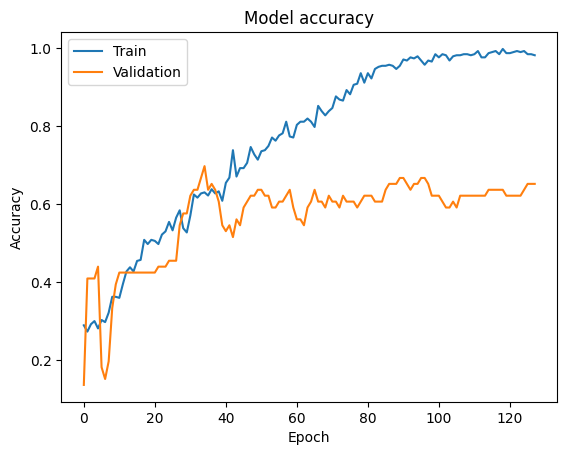

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # fixed spelling here
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [35]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 256)        │       175,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │        17,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,470 (2.21 MB)

 Trainable params: 193,156 (754.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 386,314 (1.47 MB)

In [36]:
results = model.evaluate(X_test_seq_pad, y_test_oh)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5709 - loss: 1.9767
/n
Test accuracy of word embeddings model: 57.14%


In [37]:
results = model.evaluate(X_val_seq_pad, y_val_oh)
print('/n')
print('Validation accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6734 - loss: 1.5744
/n
Validation accuracy of word embeddings model: 65.15%
